<a href="https://colab.research.google.com/github/AritraStark/Deeplense_GSOC_2022/blob/main/Deeplense_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the dataset: 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip -qq gdrive/MyDrive/dataset_deeplense.zip
print('Extraction done.')

Mounted at /content/gdrive
Extraction done.


Setting up imports:

In [4]:
import os
import numpy as np
import tensorflow as tf
import cv2
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder

Visualizing the data:

Samples with no substructure: 


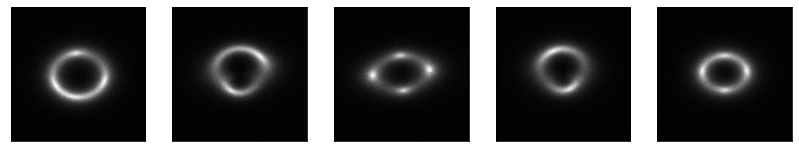

Samples with spherical substructure: 


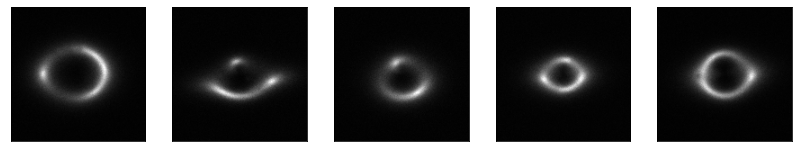

Samples with vortex substructure: 


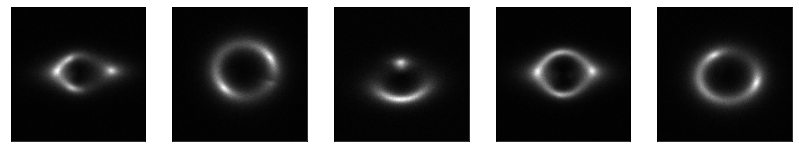

In [6]:
# Define the input paths
train = os.listdir('./dataset/train')
val = os.listdir('./dataset/val')
train_path1 = './dataset/train/no'
train_files1 = [os.path.join(train_path1, f) for f in os.listdir(train_path1) if f.endswith(".npy")]
train_path2 = './dataset/train/sphere'
train_files2 = [os.path.join(train_path2, f) for f in os.listdir(train_path2) if f.endswith(".npy")]
train_path3 = './dataset/train/vort'
train_files3 = [os.path.join(train_path3, f) for f in os.listdir(train_path3) if f.endswith(".npy")]

# Number of samples to display per class
n = 5

# Plot the samples 
i = 1
print('Samples with no substructure: ')
plt.rcParams['figure.figsize'] = [14, 14]
for image in train_files1[:n]:
    ax = plt.subplot(3,n,i)
    plt.imshow(np.load(image).reshape(150,150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    i += 1
plt.show()

print('Samples with spherical substructure: ')
plt.rcParams['figure.figsize'] = [14, 14]
for image in train_files2[:n]:
    ax = plt.subplot(3,n,i)
    plt.imshow(np.load(image).reshape(150,150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    i += 1
plt.show()

print('Samples with vortex substructure: ')
plt.rcParams['figure.figsize'] = [14, 14]
for image in train_files3[:n]:
    ax = plt.subplot(3,n,i)
    plt.imshow(np.load(image).reshape(150,150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    i += 1

Loading the training data:

In [7]:
train_X = []
train_y = []

for i in range(len(train)):
    if os.path.isdir("./dataset/train/" + train[i]):
        for j in range(len(os.listdir('./dataset/train/' + train[i]))):
            img = np.load('./dataset/train/' + train[i] + '/' + os.listdir('./dataset/train/' + train[i])[j])
            img = cv2.resize(img[0], (75, 75))
            img = np.stack([img, img, img], -1)
            train_X.append(img)
            train_y.append(train[i])
        print(train[i] + ' loaded')

no loaded
vort loaded
sphere loaded


Introducing randomness in the training dataset:

In [8]:
train = list(zip(train_X, train_y))
random.shuffle(train)
train_X, train_y = zip(*train)
del train

Loading the validation data: 

In [9]:
test_X = []
test_y = []

for i in range(len(val)):
    if os.path.isdir("./dataset/val/" + val[i]):
        for j in range(len(os.listdir('./dataset/val/' + val[i]))):
            img = np.load('./dataset/val/' + val[i] + '/' + os.listdir('./dataset/val/' + val[i])[j])
            img = cv2.resize(img[0], (75, 75))
            img = np.stack([img, img, img], -1)
            test_X.append(img)
            test_y.append(val[i])
        print(val[i] + ' loaded')

no loaded
vort loaded
sphere loaded


Introducing randomness in the validation dataset:

In [10]:
val = list(zip(test_X, test_y))
random.shuffle(val) 
test_X, test_y = zip(*val)
del val

Pre processing the datasets for fitting to the CNN model:

In [11]:
le = LabelEncoder()

train_y = le.fit_transform(train_y)
test_y = le.fit_transform(test_y)
train_X = np.array(train_X)
train_y = np.array(train_y)

test_X = np.array(test_X)
test_y = np.array(test_y)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((30000, 75, 75, 3), (30000,), (7500, 75, 75, 3), (7500,))

Loading and compiling the model:

In [12]:
model = tf.keras.applications.Xception(
          include_top=True, 
          weights=None,
          input_shape=(75, 75, 3),
          classes=3,
          classifier_activation='softmax'
        )
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
filepath="classifier_weights2-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint1 = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

Fitting the model with the processed data: 

In [13]:
history = model.fit(train_X,  
                    train_y, 
                    epochs=20, 
                    validation_data=(test_X, test_y)
)

Epoch 1/20
938/938 [==============================] - 99s 89ms/step - loss: 1.1366 - accuracy: 0.3308 - val_loss: 1.1131 - val_accuracy: 0.3333
Epoch 2/20
938/938 [==============================] - 82s 88ms/step - loss: 1.1179 - accuracy: 0.3344 - val_loss: 1.1290 - val_accuracy: 0.3445
Epoch 3/20
938/938 [==============================] - 84s 90ms/step - loss: 1.1130 - accuracy: 0.3486 - val_loss: 1.1238 - val_accuracy: 0.3508
Epoch 4/20
938/938 [==============================] - 85s 91ms/step - loss: 1.0711 - accuracy: 0.4036 - val_loss: 1.1487 - val_accuracy: 0.4096
Epoch 5/20
938/938 [==============================] - 86s 92ms/step - loss: 1.0084 - accuracy: 0.4636 - val_loss: 1.0916 - val_accuracy: 0.4173
Epoch 6/20
938/938 [==============================] - 87s 93ms/step - loss: 0.9714 - accuracy: 0.4967 - val_loss: 1.1286 - val_accuracy: 0.4048
Epoch 7/20
938/938 [==============================] - 87s 92ms/step - loss: 0.9456 - accuracy: 0.5197 - val_loss: 0.9748 - val_accuracy:

Plotting the accuracy metrics of the model:

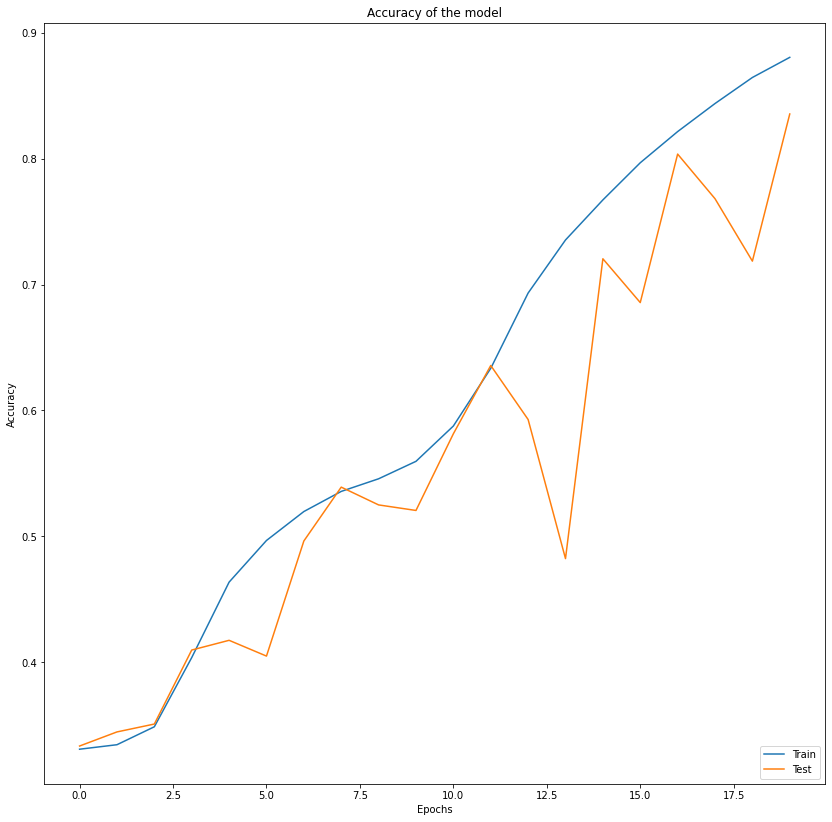

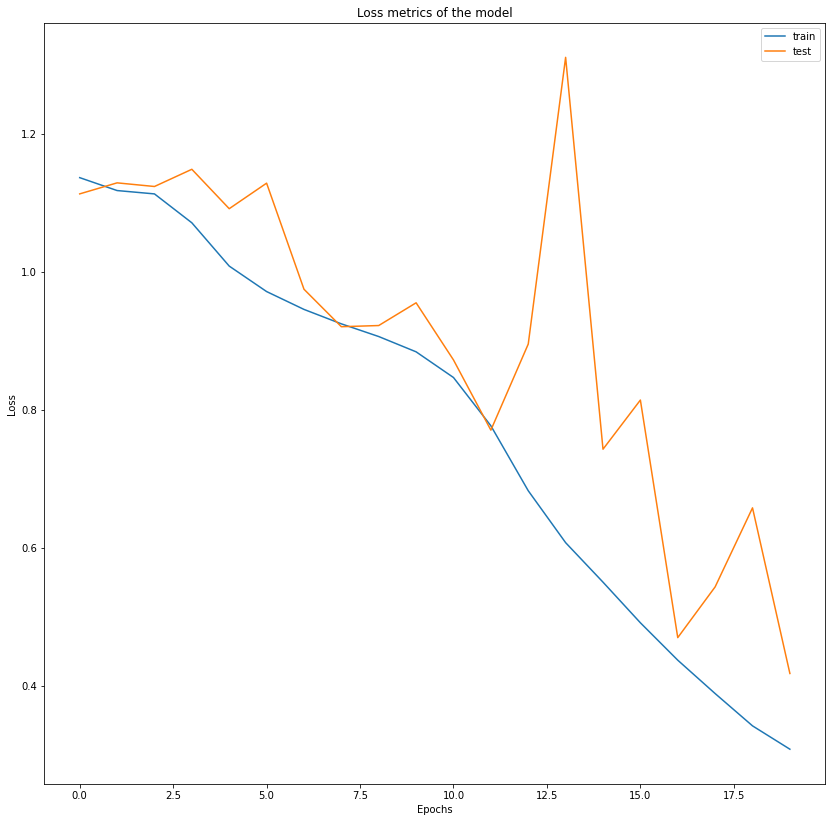

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss metrics of the model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
best_epoch=np.argmax(history.history['val_accuracy'])
best_acc=np.max(history.history['val_accuracy'])
model.load_weights(f"classifier_weights2-improvement-{best_epoch+1}-{best_acc:.2f}.hdf5")

Plotting the ROC AUC curve: 

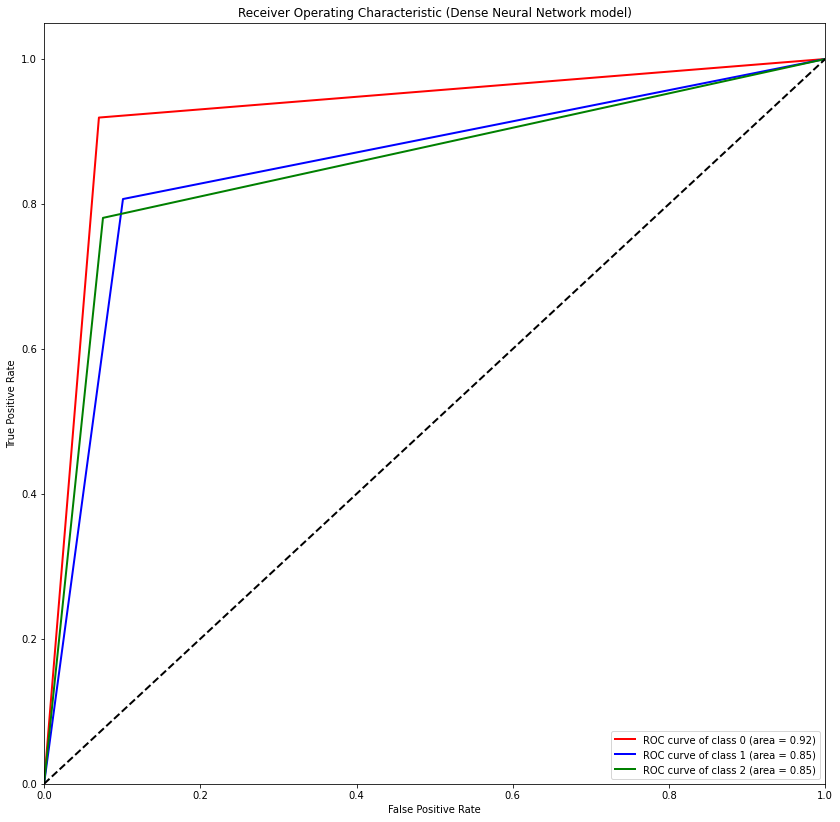

In [15]:
prediction = model.predict(test_X)

for i in prediction:
    k = np.argmax(i)
    for j in range(3):
        if j == k:
            i[j] = 1
        else:
            i[j] = 0

temp_test_y = []

for i in range(len(test_y)):
    a = [0, 0, 0]
    a[test_y[i]] = 1
    temp_test_y.append(a)

temp_test_y = np.array(temp_test_y)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(temp_test_y[:, i], prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['red', 'blue', 'green']

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
             
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Dense Neural Network model)')
plt.legend(loc="lower right")
plt.show()